In [2]:
import pandas as pd
import numpy as np

In [3]:
path = "/home/sysadm/Downloads/stocks/" #Set your directory path

aapl = pd.read_csv(path+"AAPL.csv")
bac = pd.read_csv(path+"BAC.csv")
bg = pd.read_csv(path+"BG.csv")
ctva = pd.read_csv(path+"CTVA.csv")
gm = pd.read_csv(path+"GM.csv")
goog = pd.read_csv(path+"GOOG.csv")
jnj = pd.read_csv(path+"JNJ.csv")
pfe = pd.read_csv(path+"PFE.csv")
wfc = pd.read_csv(path+"WFC.csv")
xom = pd.read_csv(path+"XOM.csv")

In [167]:
def get_return(df):
    df['return'] = df.Close.pct_change()
    df.fillna(method='bfill', inplace=True)
    return df

In [ ]:
aapl = get_return(aapl)
bac = get_return(bac)
bg = get_return(bg)
ctva = get_return(ctva)
gm = get_return(gm)
goog = get_return(goog)
jnj = get_return(jnj)
pfe = get_return(pfe)
wfc = get_return(wfc)
xom = get_return(xom)

In [ ]:
r = np.zeros(shape=(10,502),dtype=np.float64)

In [ ]:
# Concatenating all returns in a single matrix
r[0,:] = aapl["return"]
r[1,:] = bac["return"]
r[2,:] = bg["return"]
r[3,:] = ctva["return"]
r[4,:] = gm["return"]
r[5,:] = goog["return"]
r[6,:] = jnj["return"]
r[7,:] = pfe["return"]
r[8,:] = wfc["return"]
r[9,:] = xom["return"]

In [ ]:
def get_weights(r,x):
    mean=np.mean(r,axis=1)
    cov = np.cov(r, rowvar=True)
    k = np.column_stack([mean,np.ones(10)])
    b = np.array([x,1])
    vi = np.linalg.inv(cov)
    wo = vi @ k @ k.T @ vi @ k @ b
    wo =wo/ np.sum(wo)
    s = b.T @ np.linalg.inv(k.T @ vi @ k) @ b
    return wo, s

In [174]:
returns = r[:,0:377]
w, s = get_weights(returns, 0.01)

print("Optimal Weights:", w)
print("Portfolio Variance:", s)

Optimal Weights: [-0.0211327   0.00827205  0.09950677  0.04226889 -0.00615709  0.0526302
  0.65697391  0.04955314  0.02608071  0.09200413]
Portfolio Variance: 0.004717713492539644


In [132]:
# Case 1 No Updation of Weights for 6 months
returns = r[:,377:]

mean_returns = w @ np.mean(returns, axis = 1)
dr = w.T @ returns
tssd = np.sum((dr - np.mean(dr))**2)

print("Expected Returns of Portfolio is", mean_returns)
print("Total sum of squared deviations of returns is", tssd) 

Expected Returns of Portfolio is 0.0005795806309063465
Total sum of squared deviations of returns is 0.009712065534906934


In [137]:
sumr1=0
sumr2=0
sumv1=0
sumv2=0

In [133]:
# Case 2 Updating Portfolio Weights every month
returns = r[:,0:377]
w, s = get_weights(returns, 0.01)

In [138]:
for i in range(6):
    end = min(399+21*i,501)
    returns = r[:,377+21*i:end]
    #print(377+21*i, end)
    
    mean_returns = w @ np.mean(returns, axis = 1)
    dr = w.T @ returns
    tssd = np.sum((dr - np.mean(dr))**2)
    
    print(f"Expected Returns of Portfolio for month {i+1} is", mean_returns)
    print("Total sum of squared deviations of returns is", tssd, end="\n\n") 
    sumr1 += mean_returns
    sumv1 += tssd
    # Updating the weights
    returns = r[:,0:end]
    w, s = get_weights(returns, 0.01)

Expected Returns of Portfolio for month 1 is 0.00024980654112435213
Total sum of squared deviations of returns is 0.0021128177350788055

Expected Returns of Portfolio for month 2 is 0.002337326612270486
Total sum of squared deviations of returns is 0.001995841230094543

Expected Returns of Portfolio for month 3 is -0.0023046539833093006
Total sum of squared deviations of returns is 0.00047246476296825283

Expected Returns of Portfolio for month 4 is 0.0021272902317472408
Total sum of squared deviations of returns is 0.0007638830016404862

Expected Returns of Portfolio for month 5 is 0.0018540907936499707
Total sum of squared deviations of returns is 0.0026501314769721866

Expected Returns of Portfolio for month 6 is -0.0005074953376167349
Total sum of squared deviations of returns is 0.0011390662571956907



In [135]:
# Case 2 Updating Portfolio Weights every 3 months
returns = r[:,0:377]
w, s = get_weights(returns, 0.01)

In [139]:
for i in range(2):
    end = min(440+63*i,501)
    returns = r[:,377+21*i:end]
    #print(377+21*i, end)
    
    mean_returns = w @ np.mean(returns, axis = 1)
    dr = w.T @ returns
    tssd = np.sum((dr - np.mean(dr))**2)
    
    print(f"Expected Returns of Portfolio for quarter {i+1} is", mean_returns)
    print("Total sum of squared deviations of returns is", tssd, end="\n\n") 

    sumr2 += mean_returns
    sumv2 += tssd
    
    # Updating the weights
    returns = r[:,0:end]
    w, s = get_weights(returns, 0.01)

Expected Returns of Portfolio for quarter 1 is 0.00013280594813742835
Total sum of squared deviations of returns is 0.004374847927787686

Expected Returns of Portfolio for quarter 2 is 0.0007049622271339864
Total sum of squared deviations of returns is 0.007172078450709056



In [ ]:
Expected Returns of Portfolio is 0.0005795806309063465
Total sum of squared deviations of returns is 0.009712065534906934

In [142]:
sumr1/6

0.0006260608096443355

In [143]:
sumv1/6

0.0015223674106583276

In [144]:
sumr2/2

0.00041888408763570735

In [145]:
sumv2/2

0.005773463189248372

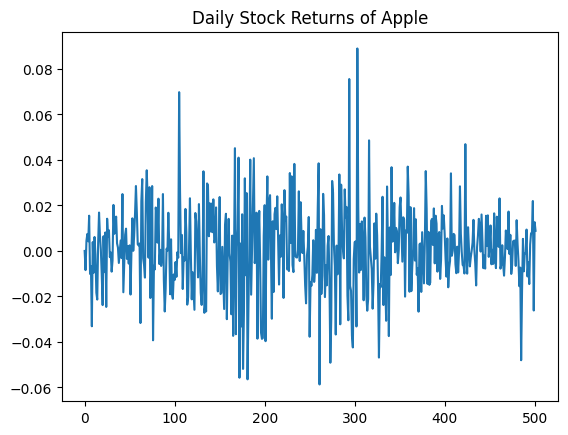

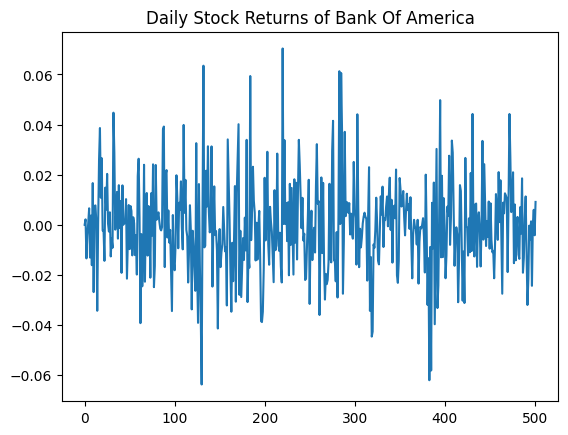

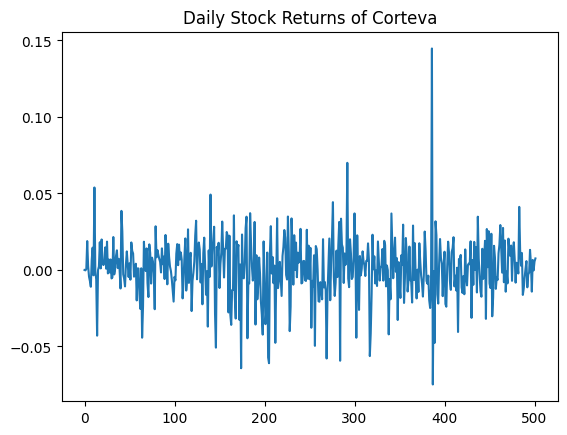

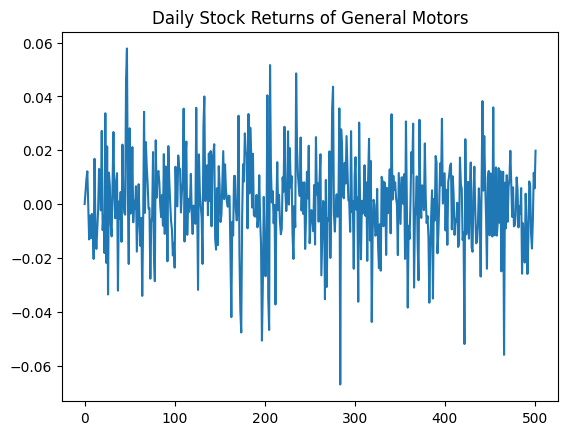

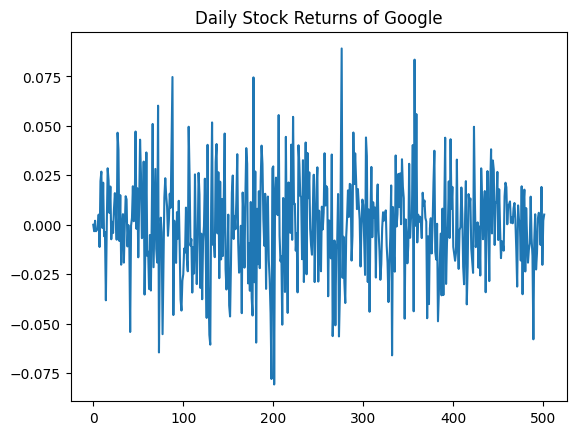

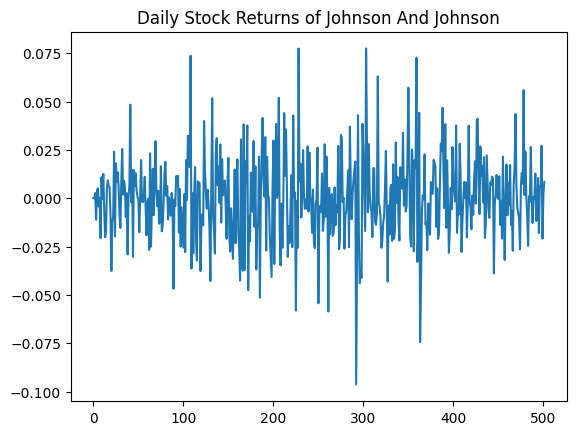

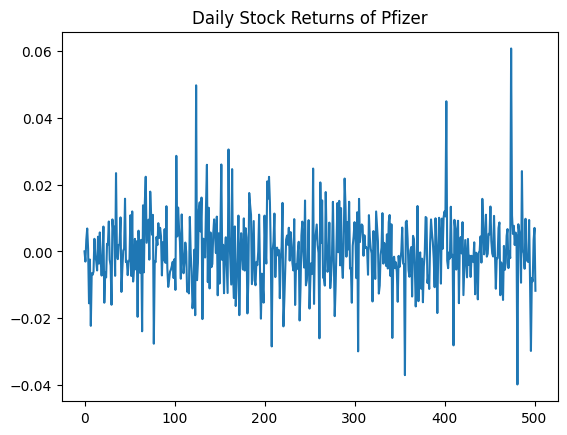

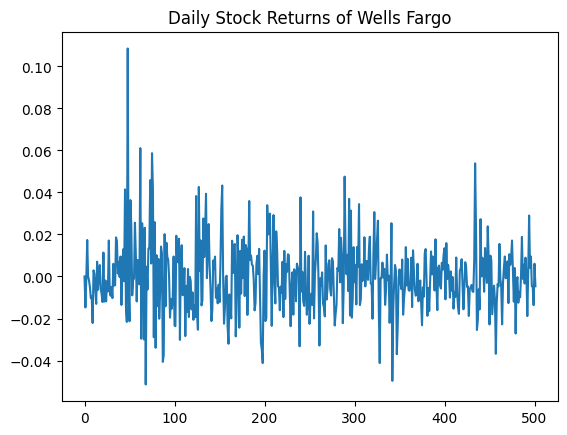

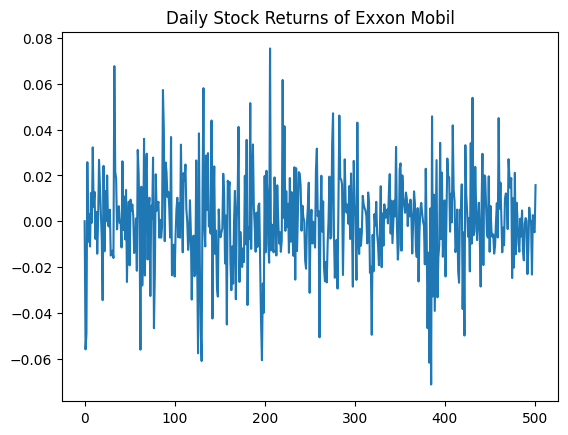

IndexError: list index out of range

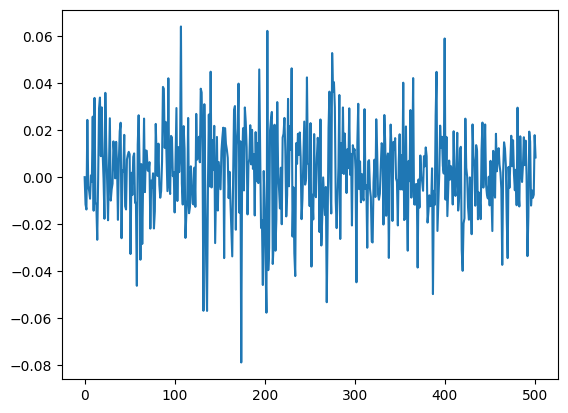

In [181]:
import pandas as pd
import matplotlib.pyplot as plt


for i in range(10):
    # Select the first row of the DataFrame
    first_row = r[i,:]
    # Plot the selected row
    plt.plot(first_row)
    plt.title("Daily Stock Returns of "+ cmp[i])
    plt.show()

In [182]:
cmp = ["Apple", "Bank Of America", "Bunge", "Corteva", "General Motors", "Google", "Johnson And Johnson", "Pfizer", "Wells Fargo", "Exxon Mobil"]

In [ ]:
aapl
bac = get_return(bac)
bg = get_return(bg)
ctva = get_return(ctva)
gm = get_return(gm)
goog = get_return(goog)
jnj = get_return(jnj)
pfe = get_return(pfe)
wfc = get_return(wfc)
xom = get_return(xom)

In [178]:
cmp[0]

'Apple'

In [166]:
get_return(xom)

,Date,Open,High,Low,Close,Adj Close,Volume,return
0,2021-08-30,56.240002,56.340000,55.119999,55.160000,51.086254,14086100,-0.011603
1,2021-08-31,54.930000,55.310001,54.459999,54.520000,50.493519,27104100,-0.011603
2,2021-09-01,54.490002,54.759998,53.599998,53.770000,49.798904,21644100,-0.013756
3,2021-09-02,54.290001,55.639999,54.270000,55.080002,51.012165,23293300,0.024363
4,2021-09-03,55.119999,55.320000,54.599998,54.869999,50.817673,13840000,-0.003813
...,...,...,...,...,...,...,...,...
497,2023-08-22,109.169998,109.720001,107.949997,108.099998,108.099998,10520800,-0.005611
498,2023-08-23,107.040001,107.300003,105.720001,107.150002,107.150002,11435600,-0.008788
499,2023-08-24,106.419998,107.769997,106.070000,106.349998,106.349998,10818500,-0.007466
500,2023-08-25,107.430000,108.930000,106.620003,108.250000,108.250000,13578900,0.017866


In [165]:
def get_return(df):
    #for i in range(1, len(df)):
        #df.loc[i, 'return'] = (df.loc[i, 'Close'] - df.loc[i - 1, 'Close'])/df.loc[i - 1, 'Close']
    df['return'] = df.Close.pct_change()
    df.fillna(method='bfill', inplace=True)
    return df

In [162]:
df.fillna()?

SyntaxError: invalid syntax (1103469928.py, line 1)

In [91]:
# Create a new column to store the daily returns
adm['return'] = 0

# Calculate the daily returns
for i in range(1, len(adm)):
    adm.loc[i, 'return'] = (adm.loc[i, 'Close'] - adm.loc[i - 1, 'Close'])/adm.loc[i - 1, 'Close']

print(adm[["Close","return"]])

NameError: name 'adm' is not defined

In [4]:
# Create a new column to store the daily returns
aapl['return'] = 0
# Calculate the daily returns
for i in range(1, len(aapl)):
    aapl.loc[i, 'return'] = (aapl.loc[i, 'Close'] - aapl.loc[i - 1, 'Close'])/aapl.loc[i - 1, 'Close']

In [5]:
# Create a new column to store the daily returns
bac['return'] = 0
# Calculate the daily returns
for i in range(1, len(bac)):
    bac.loc[i, 'return'] = (bac.loc[i, 'Close'] - bac.loc[i - 1, 'Close'])/bac.loc[i - 1, 'Close']

In [6]:
# Create a new column to store the daily returns
bg['return'] = 0
# Calculate the daily returns
for i in range(1, len(bg)):
    bg.loc[i, 'return'] = (bg.loc[i, 'Close'] - bg.loc[i - 1, 'Close'])/bg.loc[i - 1, 'Close']

In [7]:
# Create a new column to store the daily returns
ctva['return'] = 0
# Calculate the daily returns
for i in range(1, len(ctva)):
    ctva.loc[i, 'return'] = (ctva.loc[i, 'Close'] - ctva.loc[i - 1, 'Close'])/ctva.loc[i - 1, 'Close']

In [8]:
# Create a new column to store the daily returns
gm['return'] = 0
# Calculate the daily returns
for i in range(1, len(gm)):
    gm.loc[i, 'return'] = (gm.loc[i, 'Close'] - gm.loc[i - 1, 'Close'])/gm.loc[i - 1, 'Close']

In [9]:
# Create a new column to store the daily returns
goog['return'] = 0
# Calculate the daily returns
for i in range(1, len(goog)):
    goog.loc[i, 'return'] = (goog.loc[i, 'Close'] - goog.loc[i - 1, 'Close'])/goog.loc[i - 1, 'Close']

In [10]:
# Create a new column to store the daily returns
jnj['return'] = 0
# Calculate the daily returns
for i in range(1, len(jnj)):
    jnj.loc[i, 'return'] = (jnj.loc[i, 'Close'] - jnj.loc[i - 1, 'Close'])/jnj.loc[i - 1, 'Close']

In [11]:
# Create a new column to store the daily returns
pfe['return'] = 0
# Calculate the daily returns
for i in range(1, len(pfe)):
    pfe.loc[i, 'return'] = (pfe.loc[i, 'Close'] - pfe.loc[i - 1, 'Close'])/pfe.loc[i - 1, 'Close']

In [12]:
# Create a new column to store the daily returns
wfc['return'] = 0
# Calculate the daily returns
for i in range(1, len(wfc)):
    wfc.loc[i, 'return'] = (wfc.loc[i, 'Close'] - wfc.loc[i - 1, 'Close'])/wfc.loc[i - 1, 'Close']

In [13]:
# Create a new column to store the daily returns
xom['return'] = 0
# Calculate the daily returns
for i in range(1, len(xom)):
    xom.loc[i, 'return'] = (xom.loc[i, 'Close'] - xom.loc[i - 1, 'Close'])/xom.loc[i - 1, 'Close']

In [14]:
r = np.zeros(shape=(10,502),dtype=np.float64)

In [15]:
r[0,:] = aapl["return"]
r[1,:] = bac["return"]
r[2,:] = bg["return"]
r[3,:] = ctva["return"]
r[4,:] = gm["return"]
r[5,:] = goog["return"]
r[6,:] = jnj["return"]
r[7,:] = pfe["return"]
r[8,:] = wfc["return"]
r[9,:] = xom["return"]

In [16]:
r

array([[ 0.        , -0.00842472,  0.00447865, ..., -0.02617044,
         0.01264313,  0.00884609],
       [ 0.        ,  0.00216035, -0.0134132 , ...,  0.0059754 ,
        -0.00419291,  0.00912281],
       [ 0.        , -0.00026415,  0.00066045, ..., -0.00026763,
         0.0055313 ,  0.00754147],
       ...,
       [ 0.        , -0.01475616, -0.00065116, ..., -0.01363884,
         0.0060841 , -0.00467295],
       [ 0.        , -0.05598015, -0.04923413, ..., -0.00432591,
        -0.00482742,  0.01576524],
       [ 0.        , -0.01160261, -0.01375642, ..., -0.00746621,
         0.01786556,  0.0084065 ]])

In [17]:
r.shape

(10, 502)

In [99]:
def get_weights(r,x):
    mean=np.mean(r,axis=1)
    cov = np.cov(r, rowvar=True)
    k = np.column_stack([mean,np.ones(10)])
    b = np.array([x,1])
    vi = np.linalg.inv(cov)
    wo = vi @ k @ k.T @ vi @ k @ b
    wo =wo/ np.sum(wo)
    s = b.T @ np.linalg.inv(k.T @ vi @ k) @ b
    return wo, s

In [131]:
returns = r[:,0:377]
w, s = get_weights(returns, 0.01)

print("Optimal Weights:", w)
print("Portfolio Variance:", s)

Optimal Weights: [-0.0211327   0.00827205  0.09950677  0.04226889 -0.00615709  0.0526302
  0.65697391  0.04955314  0.02608071  0.09200413]
Portfolio Variance: 0.004717713492539644


In [132]:
# Case 1 No Updation of Weights for 6 months
returns = r[:,377:]

mean_returns = w @ np.mean(returns, axis = 1)
dr = w.T @ returns
tssd = np.sum((dr - np.mean(dr))**2)

print("Expected Returns of Portfolio is", mean_returns)
print("Total sum of squared deviations of returns is", tssd) 

Expected Returns of Portfolio is 0.0005795806309063465
Total sum of squared deviations of returns is 0.009712065534906934


In [137]:
sumr1=0
sumr2=0
sumv1=0
sumv2=0

In [133]:
# Case 2 Updating Portfolio Weights every month
returns = r[:,0:377]
w, s = get_weights(returns, 0.01)

In [138]:
for i in range(6):
    end = min(399+21*i,501)
    returns = r[:,377+21*i:end]
    #print(377+21*i, end)
    
    mean_returns = w @ np.mean(returns, axis = 1)
    dr = w.T @ returns
    tssd = np.sum((dr - np.mean(dr))**2)
    
    print(f"Expected Returns of Portfolio for month {i+1} is", mean_returns)
    print("Total sum of squared deviations of returns is", tssd, end="\n\n") 
    sumr1 += mean_returns
    sumv1 += tssd
    # Updating the weights
    returns = r[:,0:end]
    w, s = get_weights(returns, 0.01)

Expected Returns of Portfolio for month 1 is 0.00024980654112435213
Total sum of squared deviations of returns is 0.0021128177350788055

Expected Returns of Portfolio for month 2 is 0.002337326612270486
Total sum of squared deviations of returns is 0.001995841230094543

Expected Returns of Portfolio for month 3 is -0.0023046539833093006
Total sum of squared deviations of returns is 0.00047246476296825283

Expected Returns of Portfolio for month 4 is 0.0021272902317472408
Total sum of squared deviations of returns is 0.0007638830016404862

Expected Returns of Portfolio for month 5 is 0.0018540907936499707
Total sum of squared deviations of returns is 0.0026501314769721866

Expected Returns of Portfolio for month 6 is -0.0005074953376167349
Total sum of squared deviations of returns is 0.0011390662571956907



In [135]:
# Case 2 Updating Portfolio Weights every 3 months
returns = r[:,0:377]
w, s = get_weights(returns, 0.01)

In [139]:
for i in range(2):
    end = min(440+63*i,501)
    returns = r[:,377+21*i:end]
    #print(377+21*i, end)
    
    mean_returns = w @ np.mean(returns, axis = 1)
    dr = w.T @ returns
    tssd = np.sum((dr - np.mean(dr))**2)
    
    print(f"Expected Returns of Portfolio for quarter {i+1} is", mean_returns)
    print("Total sum of squared deviations of returns is", tssd, end="\n\n") 

    sumr2 += mean_returns
    sumv2 += tssd
    
    # Updating the weights
    returns = r[:,0:end]
    w, s = get_weights(returns, 0.01)

Expected Returns of Portfolio for quarter 1 is 0.00013280594813742835
Total sum of squared deviations of returns is 0.004374847927787686

Expected Returns of Portfolio for quarter 2 is 0.0007049622271339864
Total sum of squared deviations of returns is 0.007172078450709056



In [ ]:
Expected Returns of Portfolio is 0.0005795806309063465
Total sum of squared deviations of returns is 0.009712065534906934

In [142]:
sumr1/6

0.0006260608096443355

In [143]:
sumv1/6

0.0015223674106583276

In [144]:
sumr2/2

0.00041888408763570735

In [145]:
sumv2/2

0.005773463189248372

In [127]:
(502-377)/2

62.5

In [128]:
62.5 + 377

439.5

In [79]:
r_one = r[:,377:398]

In [80]:
dr = w.T @ r_one

In [81]:
# Perfromance of One Month
tssd = np.sum((dr - np.mean(dr))**2)
tssd

0.002234186532672341

In [47]:
np.var(dr)*21

0.0019072837147886843

In [76]:
np.sum((dr - np.mean(dr))**2)

0.00195582635856441

In [52]:
returns = r[:,0:398]
w, s = weights(returns, 0.01)
dr = w.T @ r[:,398:419]
print("Optimal Weights:", w)
print("Portfolio Variance:", s)

Optimal Weights: [-0.01600702  0.00741239  0.06824414  0.0562594  -0.01064983  0.05885862
  0.66972646  0.05443358  0.01177375  0.0999485 ]
Portfolio Variance: 0.004784403095586432


In [37]:
# Calculate portfolio returns using optimal weights and historical data
portfolio_returns = np.dot(w.T, r_one)

# Calculate squared deviations
squared_deviations = (portfolio_returns - r_one.mean(axis=0))**2

# Calculate the sum of squares of deviations
sum_of_squares = np.sum(squared_deviations)

# Print the sum of squares of deviations
print("Sum of Squares of Deviations:", sum_of_squares)


Sum of Squares of Deviations: 0.0014993868534010411


In [53]:
tssd = np.sum((dr - np.mean(dr))**2)
tssd

0.00195582635856441

In [59]:
from pandas_datareader import data as pdr
import datetime as dt

In [57]:
# Import data
def getData(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start=start, end=end)
    stockData = stockData['Close']

    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

In [58]:
def portfolioPerformance(weights, meanReturns, covMatrix):
    returns = np.sum(meanReturns*weights)*252
    std = np.sqrt(np.dot(weights.T,np.dot(covMatrix, weights)))*np.sqrt(252)
    return returns, std

In [61]:
end = dt.datetime.now()
end

datetime.datetime(2023, 9, 1, 12, 27, 42, 800452)

In [64]:
start = end - dt.timedelta(days=365)

In [66]:
getData("GOOG.AX",start = start, end = end)

TypeError: string indices must be integers

In [34]:
# Objective function for portfolio optimization (negative Sharpe ratio)
def objective(weights):
    mean_returns = np.mean(returns, axis=1)
    port_return = np.sum(mean_returns * weights)
    port_stddev = np.sqrt(np.dot(weights.T, np.dot(np.cov(returns), weights)))
    sharpe_ratio = -port_return / port_stddev
    return sharpe_ratio

# Constraint: sum of weights equals 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds for weights (between 0 and 1)
bounds = tuple((0, 1) for _ in range(num_assets))

# Initial guess for weights
initial_weights = np.ones(num_assets) / num_assets

# Perform portfolio optimization to find optimal weights
result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

# Extract optimal weights
optimal_weights = result.x
print(optimal_weights)
decimal_format = "{:.4f}"
weights = [decimal_format.format(num) for num in optimal_weights]
print(f"Optimal Weights:, {weights}")

[2.63462886e-01 5.63785130e-17 7.36537114e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.16333634e-17 4.03323208e-17]
Optimal Weights:, ['0.2635', '0.0000', '0.7365', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000']


In [27]:
from scipy.optimize import minimize

In [169]:
sum(optimal_weights)

0.9999999999999999

In [170]:
returns.shape

(10, 502)

In [41]:
k = np.column_stack([mean,np.ones(10)])
k

array([[ 4.98745455e-04,  1.00000000e+00],
       [-5.66063145e-04,  1.00000000e+00],
       [ 1.00304121e-03,  1.00000000e+00],
       [ 4.44947766e-04,  1.00000000e+00],
       [-4.76302316e-04,  1.00000000e+00],
       [ 3.72020584e-05,  1.00000000e+00],
       [-5.30877829e-05,  1.00000000e+00],
       [-3.68184898e-04,  1.00000000e+00],
       [-8.00956865e-05,  1.00000000e+00],
       [-8.83092676e-04,  1.00000000e+00]])

In [58]:
b = np.array([0,1])

In [43]:
vi = np.linalg.inv(cov)

In [49]:
wo = vi @ k @ k.T @ vi @ k @ b

In [54]:
np.sum(wo)

169697522.53701487

In [55]:
wo/np.sum(wo)

array([ 0.01544576, -0.01105831,  0.10620051,  0.07052939, -0.00951641,
        0.0515283 ,  0.47823468,  0.05797036,  0.01235198,  0.22831374])

In [59]:
s = b.T @ np.linalg.inv(k.T @ vi @ k) @ b

In [78]:
s

7.736568406108814e-05

In [63]:
x_values

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [194]:
# Number of assets
num_assets = returns.shape[0]

# Constraint: w.T @ returns >= b
def constraint(w):
    return np.dot(w, np.mean(returns, axis=1)) - b

# Define the bounds and initial guess
bounds = tuple((0, 1) for _ in range(num_assets))
initial_weights = np.ones(num_assets) / num_assets

# Define the value of b (modify as needed)
b = 0

# Optimization objective function (negative Sharpe ratio)
def objective(w):
    mean_returns = np.mean(returns, axis=1)
    port_return = np.dot(w, mean_returns)
    port_stddev = np.sqrt(np.dot(w.T, np.dot(np.cov(returns), w)))
    sharpe_ratio = -port_return / port_stddev
    return sharpe_ratio

# Constraints dictionary
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
               {'type': 'ineq', 'fun': constraint})

# Perform portfolio optimization with the constraint
result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

# Extract optimal weights
optimal_weights = result.x

print("Optimal Weights:", optimal_weights)


Optimal Weights: [6.08109296e-02 0.00000000e+00 1.77791447e-01 1.62630326e-17
 0.00000000e+00 0.00000000e+00 9.97465999e-18 1.01915004e-17
 0.00000000e+00 7.61397623e-01]


In [196]:

# Define the constraint function
def constraint(w, returns, b):
    return np.dot(w, np.mean(returns, axis=1)) - b

# Main optimization function
def optimize_portfolio_with_constraint(returns, b):
    """
    Optimize portfolio weights subject to a constraint.
    
    Parameters:
    returns (numpy.ndarray): Multivariate returns of various assets. Each row corresponds to an asset's returns.
    b (float): The constraint value for w.T @ returns >= b
    
    Returns:
    numpy.ndarray: Optimal portfolio weights
    """
    # Number of assets
    num_assets = returns.shape[0]

    # Define the bounds and initial guess
    bounds = tuple((0, 1) for _ in range(num_assets))
    initial_weights = np.ones(num_assets) / num_assets

    # Optimization objective function (negative Sharpe ratio)
    def objective(w):
        mean_returns = np.mean(returns, axis=1)
        port_return = np.dot(w, mean_returns)
        port_stddev = np.sqrt(np.dot(w.T, np.dot(np.cov(returns), w)))
        sharpe_ratio = -port_return / port_stddev
        return sharpe_ratio

    # Constraints dictionary
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
                   {'type': 'ineq', 'fun': constraint, 'args': (returns, b)})

    # Perform portfolio optimization with the constraint
    result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

    # Extract optimal weights
    optimal_weights = result.x

    return optimal_weights

# Example usage
returns = r
b = 0
optimal_weights = optimize_portfolio_with_constraint(returns, b)
print("Optimal Weights:", optimal_weights)


Optimal Weights: [6.08109296e-02 0.00000000e+00 1.77791447e-01 1.62630326e-17
 0.00000000e+00 0.00000000e+00 9.97465999e-18 1.01915004e-17
 0.00000000e+00 7.61397623e-01]


In [205]:
# Case 1
returns = r[:,0:377]
b = 0
optimal_weights = optimize_portfolio_with_constraint(returns, b)
print("Optimal Weights:", optimal_weights)

Optimal Weights: [0.00000000e+00 0.00000000e+00 6.72071099e-17 1.96376795e-01
 4.51340156e-18 4.50760224e-18 0.00000000e+00 3.93425053e-17
 3.22057463e-18 8.03623205e-01]


In [203]:
r.shape[1]*0.75

376.5

# Final Solution

In [257]:
# Optimization objective function (negative Sharpe ratio)
def objective(w):
    port_return = np.dot(w, mean_returns)
    port_stddev = np.sqrt(np.dot(w.T, np.dot(cov_matrix, w)))
    sharpe_ratio = -port_return / port_stddev
    return sharpe_ratio
def weights(returns):
    # Calculate expected returns and covariance matrix
    mean_returns = np.mean(returns,axis=1)
    cov_matrix = np.cov(returns)
    
    # Number of assets
    num_assets = len(mean_returns)
    # Define the bounds and initial guess
    bounds = tuple((0, 1) for _ in range(num_assets))
    initial_weights = np.ones(num_assets) / num_assets
    
    # Constraints dictionary (sum of weights = 1)
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    
    # Perform portfolio optimization
    result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    
    # Extract optimal weights
    optimal_weights = result.x
    
    # Calculate portfolio variance
    portfolio_variance = np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights))

    return optimal_weights, portfolio_variance


In [259]:
# Case 1
returns = r[:,0:377]
w, s = weights(returns)

print("Optimal Weights:", w)
print("Portfolio Variance:", s)

Optimal Weights: [6.08109296e-02 0.00000000e+00 1.77791447e-01 1.62630326e-17
 0.00000000e+00 0.00000000e+00 9.97465999e-18 1.01915004e-17
 0.00000000e+00 7.61397623e-01]
Portfolio Variance: 0.0003235951131550682


In [ ]:
import gurobipy as gp
from gurobipy import GRB

# Create a new model
m = gp.Model("qp")

# Create variables
x = m.addVar(ub=1.0, name="x")
y = m.addVar(ub=1.0, name="y")
z = m.addVar(ub=1.0, name="z")

# Set objective: x^2 + x*y + y^2 + y*z + z^2 + 2 x
obj = x**2 + x*y + y**2 + y*z + z**2 + 2*x
m.setObjective(obj)

# Add constraint: x + 2 y + 3 z >= 4
m.addConstr(x + 2 * y + 3 * z >= 4, "c0")

# Add constraint: x + y >= 1
m.addConstr(x + y >= 1, "c1")

m.optimize()

for v in m.getVars():
    print('%s %g' % (v.VarName, v.X))

print('Obj: %g' % obj.getValue())

x.VType = GRB.INTEGER
y.VType = GRB.INTEGER
z.VType = GRB.INTEGER

m.optimize()

for v in m.getVars():
    print('%s %g' % (v.VarName, v.X))

print('Obj: %g' % obj.getValue())


In [252]:
import numpy as np
from cvxopt import matrix, solvers
import numpy.linalg as la

# Sample data (replace this with your actual data)
return_vec = np.random.randn(10, 100)  # 10 assets, 100 data points

def optimal_portfolio(returns):
    n = returns.shape[0]
    N = returns.shape[1]
    returns = np.asmatrix(returns)
    
    
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = matrix(np.cov(returns))
    pbar = matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -matrix(np.eye(n))
    h = matrix(0.0, (n ,1))
    A = matrix(1.0, (1, n))
    b = matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    
    # Calculate risks and returns for the efficient frontier
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    
    # Calculate the 2nd degree polynomial of the frontier curve
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    
    # Calculate the optimal portfolio weights using quadratic programming
    wt = solvers.qp(matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(returns)
print("Optimal Portfolio Weights:", weights)


     pcost       dcost       gap    pres   dres
 0: -1.9608e-04 -1.0015e+00  1e+00  1e-16  3e+00
 1: -1.9691e-04 -1.1545e-02  1e-02  6e-17  4e-02
 2: -2.6662e-04 -1.6441e-03  1e-03  6e-17  5e-03
 3: -1.1335e-03 -2.2444e-03  1e-03  2e-16  3e-03
 4: -1.4756e-03 -1.5393e-03  6e-05  1e-16  1e-04
 5: -1.5316e-03 -1.5322e-03  6e-07  2e-16  1e-06
 6: -1.5321e-03 -1.5322e-03  6e-09  3e-16  1e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.9592e-04 -1.0015e+00  1e+00  2e-16  3e+00
 1: -1.9674e-04 -1.1545e-02  1e-02  4e-17  4e-02
 2: -2.6646e-04 -1.6439e-03  1e-03  6e-17  5e-03
 3: -1.1334e-03 -2.2443e-03  1e-03  4e-17  3e-03
 4: -1.4751e-03 -1.5388e-03  6e-05  1e-16  1e-04
 5: -1.5311e-03 -1.5318e-03  6e-07  2e-16  1e-06
 6: -1.5317e-03 -1.5317e-03  6e-09  3e-16  1e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.9574e-04 -1.0015e+00  1e+00  0e+00  3e+00
 1: -1.9657e-04 -1.1545e-02  1e-02  1e-16  4e-02
 2: -2.6629e-04 -1.6437e

In [247]:
np.sum(weights)

1.0

In [251]:
returns = r

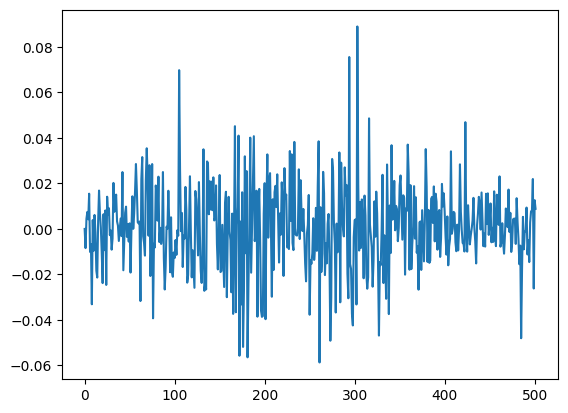

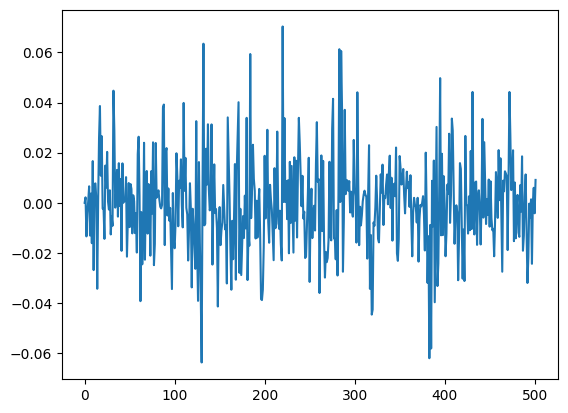

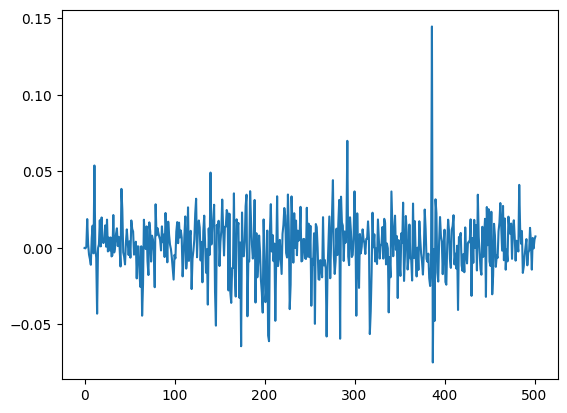

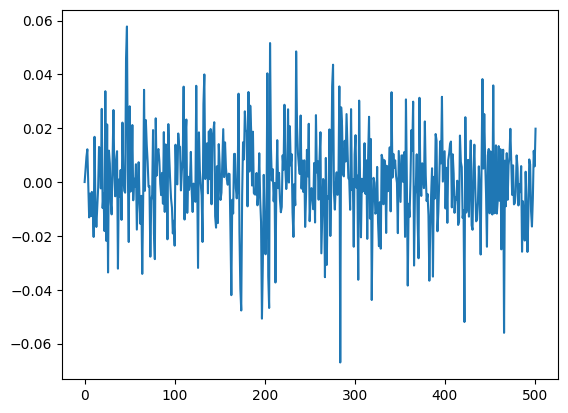

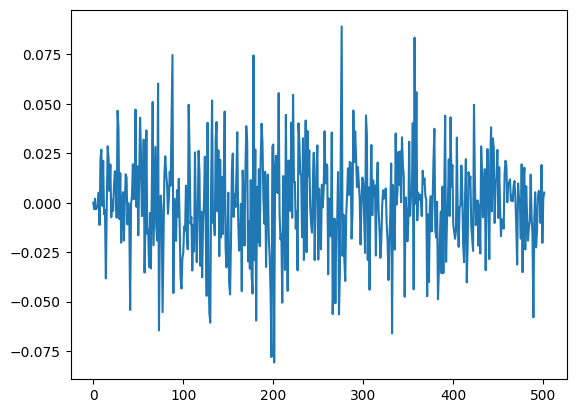

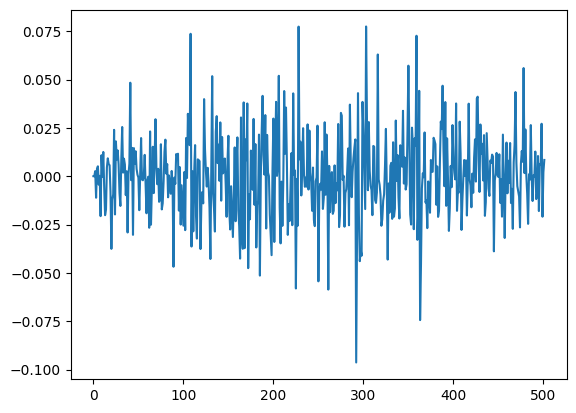

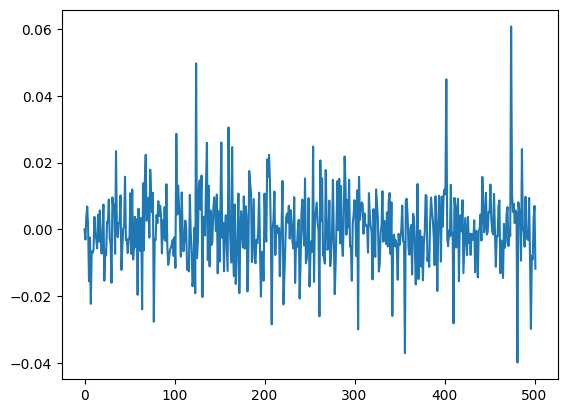

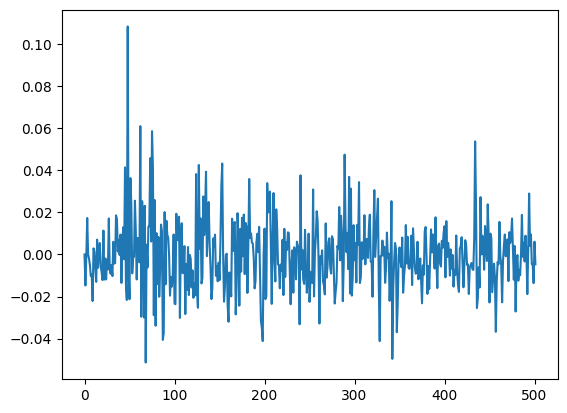

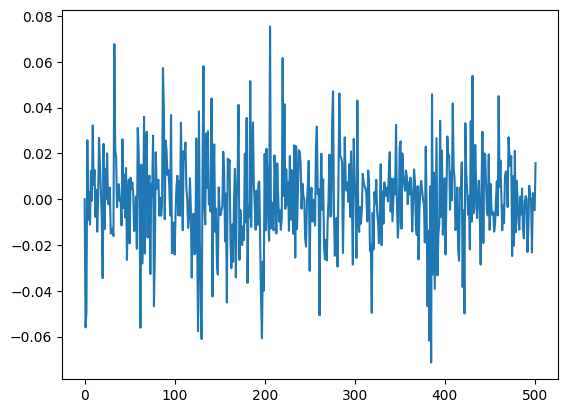

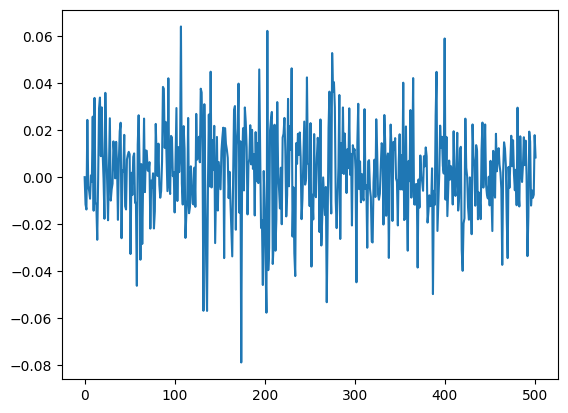

In [152]:
import pandas as pd
import matplotlib.pyplot as plt


for i in range(10):
    # Select the first row of the DataFrame
    first_row = r[i,:]
    # Plot the selected row
    plt.plot(first_row)
    plt.show()

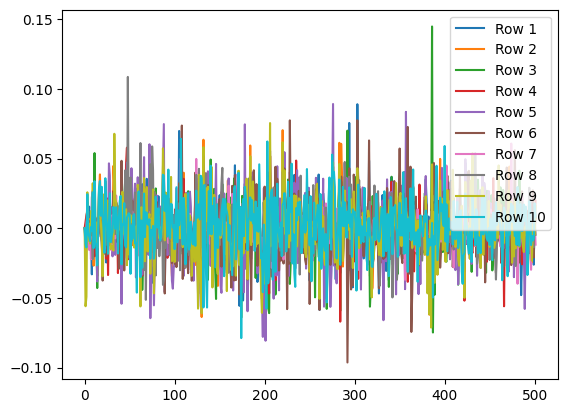

In [151]:
import numpy as np
import matplotlib.pyplot as plt


# Loop to plot each row with a legend
for i in range(10):
    # Select the i-th row of the array
    row_data = r[i, :]
    
    # Plot the selected row with a label
    plt.plot(row_data, label=f'Row {i+1}')

# Display legends
plt.legend()

# Show the plot
plt.show()
